# Wizualizacja dowolnych danych

Dataset: [Complete Dataset of RPGs in Steam (1987-2023)](https://www.kaggle.com/datasets/ericngui/rpg-steam-clean).

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr, spearmanr

In [341]:
df = pd.read_csv("rpg_steam.csv")

## Eksploracja i czyszczenie

In [342]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10477 entries, 0 to 10476
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   steam_id_number                  10477 non-null  int64  
 1   game_title                       10476 non-null  object 
 2   release_month                    10477 non-null  object 
 3   release_year                     10477 non-null  int64  
 4   release_price                    10477 non-null  float64
 5   lowest_estimated_owners_number   10477 non-null  object 
 6   highest_estimated_owners_number  10477 non-null  object 
 7   average_estimated_owners_number  10477 non-null  object 
 8   developer                        10468 non-null  object 
 9   publisher                        10458 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 818.6+ KB
None


In [343]:
df.head(5)

,steam_id_number,game_title,release_month,release_year,release_price,lowest_estimated_owners_number,highest_estimated_owners_number,average_estimated_owners_number,developer,publisher
0,1,Disco Elysium - The Final Cut,October,2019,39.99,"1,000,000","2,000,000","1,500,000",ZA/UM,ZA/UM
1,2,BioShock,August,2007,4.99,"1,000,000","2,000,000","1,500,000","2K Boston, 2K Australia",2K
2,3,Mass Effect 2 (2010),January,2010,19.99,"1,000,000","2,000,000","1,500,000",BioWare,Electronic Arts
3,4,Mass Effect 2 Digital Deluxe Edition,January,2010,29.99,"1,000,000","2,000,000","1,500,000",BioWare,Electronic Arts
4,5,Divinity: Original Sin - Enhanced Edition,October,2015,39.99,"1,000,000","2,000,000","1,500,000",Larian Studios,Larian Studios


In [344]:
df.isnull().sum()

steam_id_number                     0
game_title                          1
release_month                       0
release_year                        0
release_price                       0
lowest_estimated_owners_number      0
highest_estimated_owners_number     0
average_estimated_owners_number     0
developer                           9
publisher                          19
dtype: int64

In [345]:
# konwersja na int
df['lowest_estimated_owners_number'] = df['lowest_estimated_owners_number'].replace(',', '', regex=True).astype(int)
df['highest_estimated_owners_number'] = df['highest_estimated_owners_number'].replace(',', '', regex=True).astype(int)
df['average_estimated_owners_number'] = df['average_estimated_owners_number'].replace(',', '', regex=True).astype(int)

In [346]:
df.head(5)

,steam_id_number,game_title,release_month,release_year,release_price,lowest_estimated_owners_number,highest_estimated_owners_number,average_estimated_owners_number,developer,publisher
0,1,Disco Elysium - The Final Cut,October,2019,39.99,1000000,2000000,1500000,ZA/UM,ZA/UM
1,2,BioShock,August,2007,4.99,1000000,2000000,1500000,"2K Boston, 2K Australia",2K
2,3,Mass Effect 2 (2010),January,2010,19.99,1000000,2000000,1500000,BioWare,Electronic Arts
3,4,Mass Effect 2 Digital Deluxe Edition,January,2010,29.99,1000000,2000000,1500000,BioWare,Electronic Arts
4,5,Divinity: Original Sin - Enhanced Edition,October,2015,39.99,1000000,2000000,1500000,Larian Studios,Larian Studios


In [347]:
df['release_month'].unique()

array(['October', 'August', 'January', 'September', 'November',
       'February', 'May', 'April', 'June', 'March', 'December', 'July'],
      dtype=object)

In [348]:
df['release_year'].unique()

array([2019, 2007, 2010, 2015, 2011, 2022, 2017, 2020, 1999, 2000, 2009,
       2008, 2013, 2014, 2021, 2018, 2002, 2005, 2012, 1997, 2016, 2003,
       2001, 2004, 1989, 1983, 1996, 2006, 1986, 2023, 1998, 1988, 1992,
       1991, 1990, 1995, 1994])

In [349]:
df = df[df['release_year'] > 1986]

In [350]:
df['release_price'].min()

0.0

In [351]:
df['release_price'].max()

199.99

## Analiza przy pomocy wizualizacji

### Darmowe gry

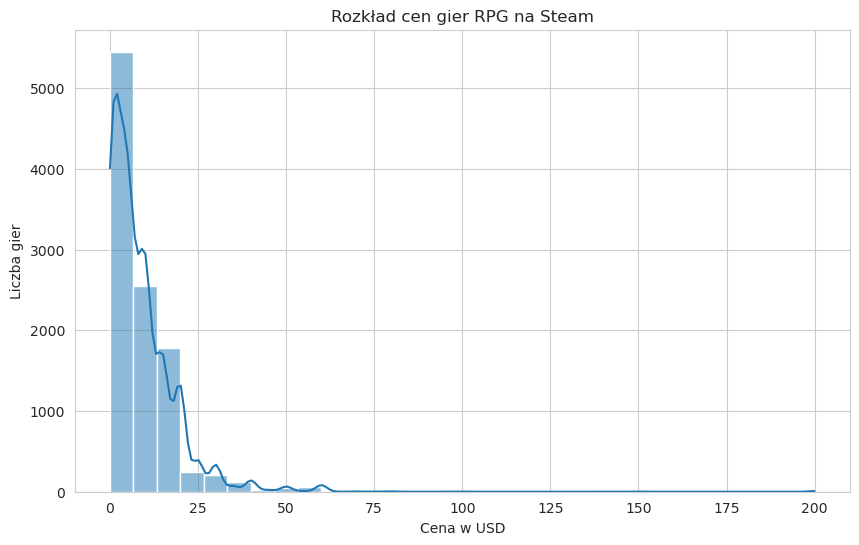

In [352]:
plt.figure(figsize=(10, 6))
sns.histplot(df['release_price'], bins=30, kde=True)
plt.title('Rozkład cen gier RPG na Steam')
plt.xlabel('Cena w USD')
plt.ylabel('Liczba gier')
plt.show()

In [353]:
darmowe_gry = df[['release_price', 'game_title']].groupby('release_price').count()
darmowe_gry = darmowe_gry.reset_index().rename(columns={'game_title': 'Liczba gier'})
darmowe_gry = darmowe_gry.sort_values(by='release_price', ascending=True)
darmowe_gry.head(10)

,release_price,Liczba gier
0,0.00,1140
1,0.46,1
2,0.49,81
3,0.50,6
4,0.51,5
5,0.53,1
6,0.54,5
7,0.55,13
8,0.59,26
9,0.60,1


In [354]:
liczba_gier = len(df)
liczba_darmowych = (df['release_price'] == 0).sum()
procent_darmowych = (liczba_darmowych / liczba_gier) * 100

print(f"Procent darmowych gier: {procent_darmowych:.2f}%")

Procent darmowych gier: 10.89%


### Związek pomiędzy ceną a popularnością

In [355]:
# Tprzedziały cenowe
bins = [0, 5, 10, 15, 20, 30, 40, 60, df['release_price'].max()]
labels = ['0-5$', '5-10$', '10-15$', '15-20$', '20-30$', '30-40$', '40-60$', '60$+']

df['przedzial_cenowy'] = pd.cut(df['release_price'], bins=bins, labels=labels, include_lowest=True)


In [356]:
popularnosc_vs_cena = df.groupby('przedzial_cenowy')['average_estimated_owners_number'].mean().round().astype(int).reset_index()
popularnosc_vs_cena.head(10)

/tmp/ipykernel_63115/1870346499.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularnosc_vs_cena = df.groupby('przedzial_cenowy')['average_estimated_owners_number'].mean().round().astype(int).reset_index()


,przedzial_cenowy,average_estimated_owners_number
0,0-5$,139550
1,5-10$,94858
2,10-15$,114410
3,15-20$,273038
4,20-30$,261967
5,30-40$,1388543
6,40-60$,1156157
7,60$+,135000


/tmp/ipykernel_63115/1932559742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popularnosc_vs_cena, x='przedzial_cenowy', y='average_estimated_owners_number', palette='viridis')


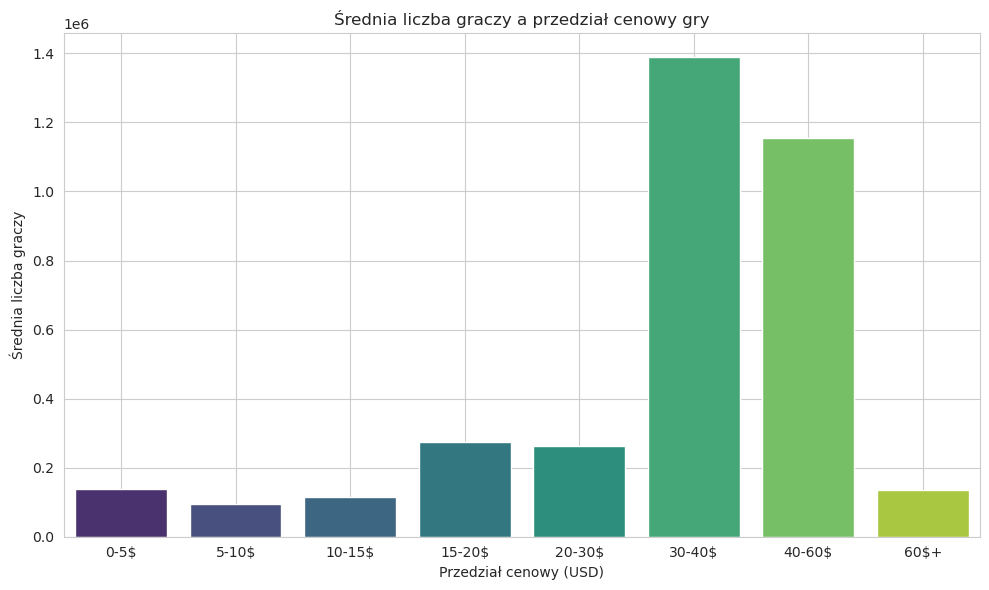

In [357]:
plt.figure(figsize=(10, 6))
sns.barplot(data=popularnosc_vs_cena, x='przedzial_cenowy', y='average_estimated_owners_number', palette='viridis')
plt.title('Średnia liczba graczy a przedział cenowy gry')
plt.xlabel('Przedział cenowy (USD)')
plt.ylabel('Średnia liczba graczy')
plt.grid(True)
plt.tight_layout()
plt.show()

### Najbardziej popularni developerzy

In [358]:
popularni_wydawcy = df.groupby('developer')['average_estimated_owners_number'].sum().reset_index()
popularni_wydawcy = popularni_wydawcy.sort_values(by='average_estimated_owners_number', ascending=False)

In [359]:

popularni_wydawcy['Liczba graczy'] = popularni_wydawcy['average_estimated_owners_number'].map('{:,}'.format)
top10 = popularni_wydawcy.head(10)[['developer', 'average_estimated_owners_number']]


print(top10)

                            developer  average_estimated_owners_number
335                      Amazon Games                         75000000
713             Bethesda Game Studios                         42250000
960                    CD PROJEKT RED                         37250000
1599                 Digital Extremes                         35000000
2173                FromSoftware Inc.                         35000000
2946                     Iron Gate AB                         35000000
1983                Facepunch Studios                         35000000
4969                         Re-Logic                         35000000
4334  OVERKILL - a Starbreeze Studio.                         35000000
2497              Grinding Gear Games                         35000000


/tmp/ipykernel_63115/1850721615.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


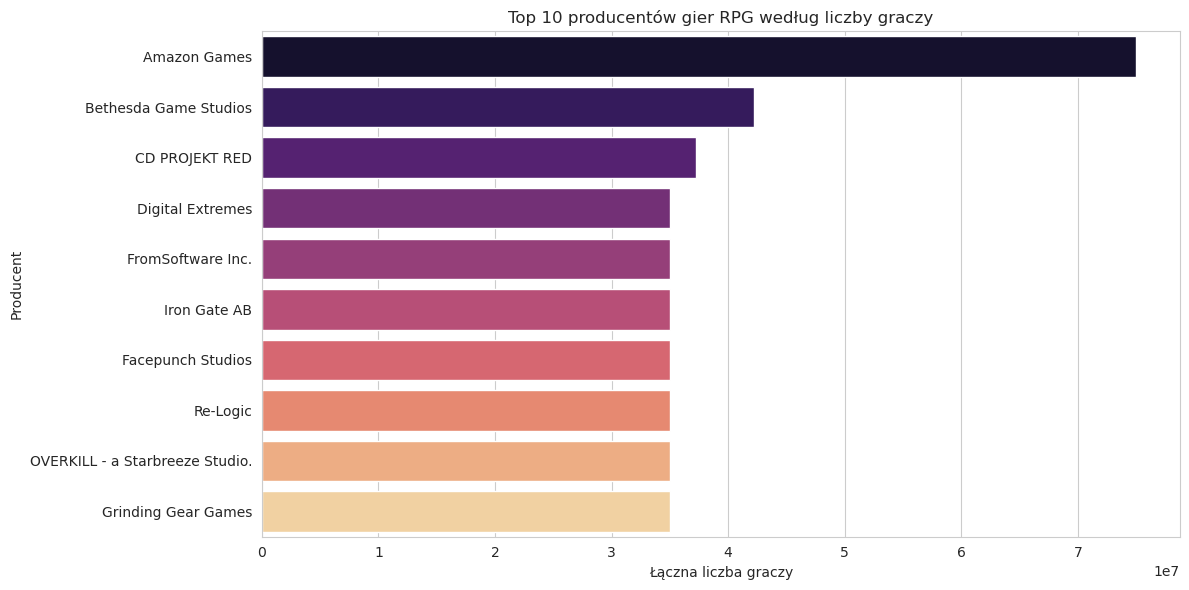

In [360]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=popularni_wydawcy.head(10),
    y='developer',
    x='average_estimated_owners_number',
    palette='magma'
)
plt.title('Top 10 producentów gier RPG według liczby graczy')
plt.xlabel('Łączna liczba graczy')
plt.ylabel('Producent')
plt.tight_layout()
plt.show()


### Najlepsze gry najlepszych producentów

In [361]:
popularni_set = (
    df.groupby('developer')['average_estimated_owners_number']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

In [362]:
popularni_set

Index(['Amazon Games', 'Bethesda Game Studios', 'CD PROJEKT RED',
       'Digital Extremes', 'FromSoftware Inc.', 'Iron Gate AB',
       'Facepunch Studios', 'Re-Logic', 'OVERKILL - a Starbreeze Studio.',
       'Grinding Gear Games'],
      dtype='object', name='developer')

In [363]:
dev_df = df[df['developer'].isin(popularni_set)]

In [364]:
dev_df.head(5)

,steam_id_number,game_title,release_month,release_year,release_price,lowest_estimated_owners_number,highest_estimated_owners_number,average_estimated_owners_number,developer,publisher,przedzial_cenowy
5,6,The Elder Scrolls IV: Oblivion Game of the Yea...,September,2007,14.99,1000000,2000000,1500000,Bethesda Game Studios,Bethesda Softworks,10-15$
6,7,The Elder Scrolls V: Skyrim,November,2011,19.99,5000000,10000000,7500000,Bethesda Game Studios,Bethesda Softworks,15-20$
7,8,ELDEN RING,February,2022,59.99,20000000,50000000,35000000,FromSoftware Inc.,"FromSoftware Inc., Bandai Namco Entertainment",40-60$
11,12,The Witcher 3: Wild Hunt,May,2015,39.99,10000000,20000000,15000000,CD PROJEKT RED,CD PROJEKT RED,30-40$
16,17,Fallout 3,October,2008,9.99,500000,1000000,750000,Bethesda Game Studios,Bethesda Softworks,5-10$


In [365]:
top_game_per_dev = (
    dev_df.sort_values('average_estimated_owners_number', ascending=False)
    .groupby('developer')
    .first()
    .reset_index()
)

In [366]:
top_game_per_dev = top_game_per_dev[[
    'developer', 'game_title', 'average_estimated_owners_number', 'release_price'
]]


top_game_per_dev.head(10)

,developer,game_title,average_estimated_owners_number,release_price
0,Amazon Games,New World,75000000,39.99
1,Bethesda Game Studios,Fallout Shelter,7500000,0.00
2,CD PROJEKT RED,The Witcher 3: Wild Hunt,15000000,39.99
3,Digital Extremes,Warframe,35000000,0.00
4,Facepunch Studios,Rust,35000000,39.99
5,FromSoftware Inc.,ELDEN RING,35000000,59.99
6,Grinding Gear Games,Path of Exile,35000000,0.00
7,Iron Gate AB,Valheim,35000000,19.99
8,OVERKILL - a Starbreeze Studio.,PAYDAY 2,35000000,4.99
9,Re-Logic,Terraria,35000000,9.99


### Czy nowe gry (po 2020) miały więcej graczy niż te starsze?

In [367]:
avg_players_per_year = (
    df.groupby('release_year')['average_estimated_owners_number']
    .mean()
    .reset_index()
)

In [368]:
def format_number(n):
    if n >= 1_000_000:
        return f"{n/1_000_000:.1f}M"
    elif n >= 1_000:
        return f"{n/1_000:.0f}K"
    else:
        return str(int(n))


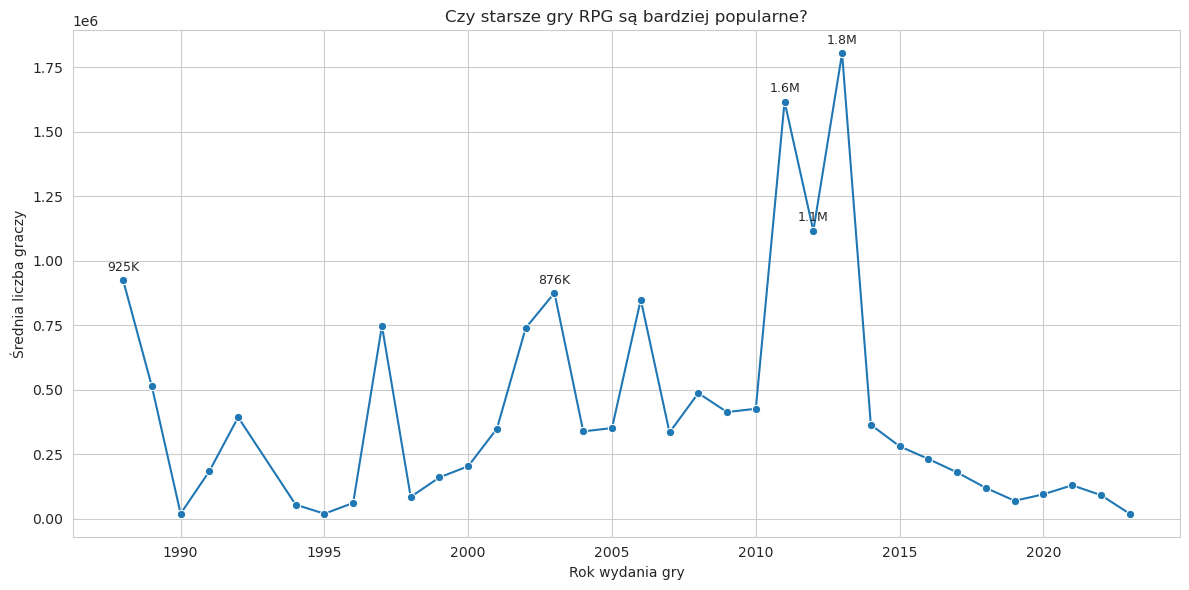

In [369]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=avg_players_per_year, 
    x='release_year', 
    y='average_estimated_owners_number', 
    marker='o'
)


for index, row in avg_players_per_year.iterrows():
    if row['average_estimated_owners_number'] > 850_000:
        plt.text(
            row['release_year'], 
            row['average_estimated_owners_number'] + 0.02 * avg_players_per_year['average_estimated_owners_number'].max(),
            format_number(row['average_estimated_owners_number']),
            ha='center',
            fontsize=9
        )


plt.title('Czy starsze gry RPG są bardziej popularne?')
plt.xlabel('Rok wydania gry')
plt.ylabel('Średnia liczba graczy')
plt.grid(True)
plt.tight_layout()
plt.show()


## Analiza korelacji

Cel: zbadać, jak średnia liczba graczy (average_estimated_owners_number) koreluje z:

- release_price, czy droższe gry mają więcej/mniej graczy?
- release_year, czy nowsze gry przyciągają więcej graczy?

In [370]:
df = df.dropna(subset=['release_price', 'average_estimated_owners_number'])

In [371]:
df['model'] = df['release_price'].apply(lambda x: 'free' if x == 0 else 'paid')
df['popularity_score'] = df['average_estimated_owners_number'] / (df['release_price'] + 1)

In [372]:
df = df[df['average_estimated_owners_number'] < 10_000_000]
df = df[df['popularity_score'] < 1_000_000]

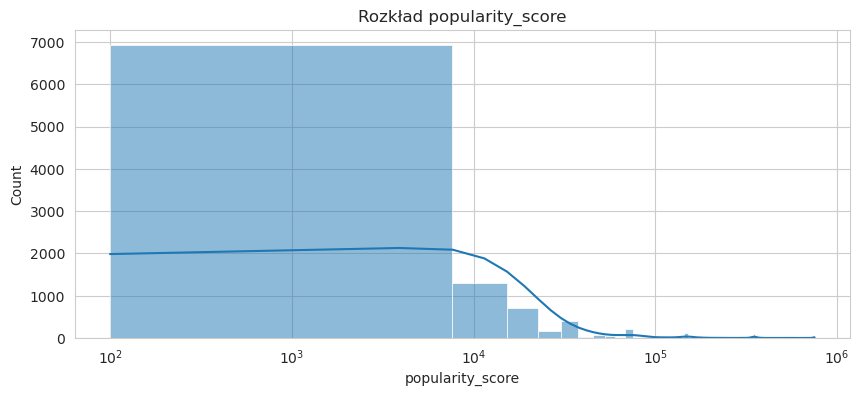

In [373]:
plt.figure(figsize=(10, 4))
sns.histplot(df['popularity_score'], bins=100, kde=True)
plt.title("Rozkład popularity_score")
plt.xscale('log')  
plt.grid(True)
plt.show()

### Rozkład nie jest normalny -- nie będziemy bawić się w normalizację, zastosujemy R Spearmana i test Manna–Whitneya

In [374]:
# Macierz korelacji
corr_df = df[['average_estimated_owners_number', 'release_price', 'release_year']]

correlation = corr_df.corr(method='spearman')
print(correlation)

                                 average_estimated_owners_number  \
average_estimated_owners_number                         1.000000   
release_price                                           0.073302   
release_year                                           -0.296107   

                                 release_price  release_year  
average_estimated_owners_number       0.073302     -0.296107  
release_price                         1.000000      0.095454  
release_year                          0.095454      1.000000  


In [375]:

corr, p_val = spearmanr(df['release_price'], df['average_estimated_owners_number'])

print(f"Współczynnik korelacji Spearmana ρ = {corr:.3f}")
print(f"P-value = {p_val:.5f}")

if p_val < 0.05:
    print("Korelacja Spearmana jest statystycznie istotna (p < 0.05).")
else:
    print("Korelacja Spearmana nie jest statystycznie istotna.")

Współczynnik korelacji Spearmana ρ = 0.073
P-value = 0.00000
Korelacja Spearmana jest statystycznie istotna (p < 0.05).


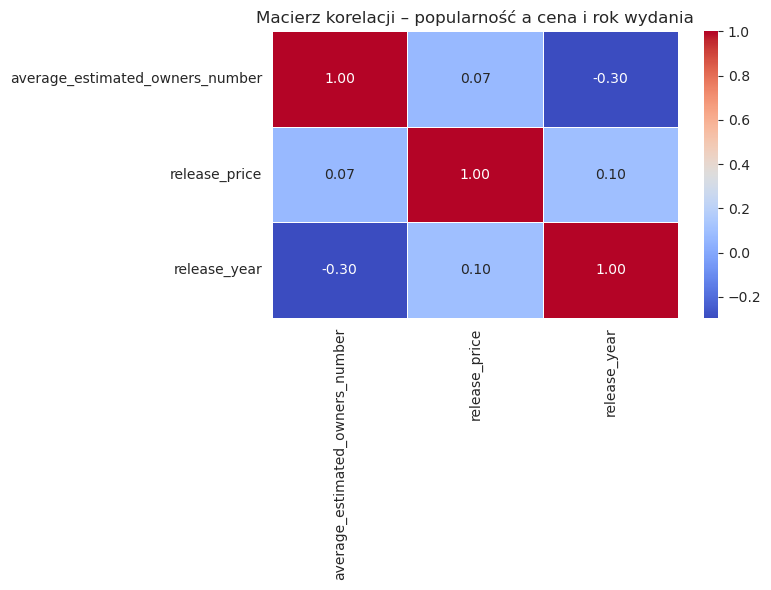

In [376]:

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Macierz korelacji – popularność a cena i rok wydania")
plt.tight_layout()
plt.show()

## Popularność gier a model dystrybucji: darmowe vs płatne

In [377]:
free = df[df['model'] == 'free']['popularity_score'].dropna()
paid = df[df['model'] == 'paid']['popularity_score'].dropna()


In [378]:
stat, p_val = mannwhitneyu(free, paid, alternative='two-sided')

print(f"U-statistic: {stat}")
print(f"P-value: {p_val:.5f}")

U-statistic: 9453852.0
P-value: 0.00000


In [379]:
p_val = 0.05
if p_val < alpha:
    print("Istnieje statystycznie istotna różnica w popularności między grami darmowymi a płatnymi.")
else:
    print(" Brak istotnej różnicy w popularności między grami darmowymi a płatnymi.")


 Brak istotnej różnicy w popularności między grami darmowymi a płatnymi.


## Korelacja w grupach: popularność a twórca

In [380]:
def group_spearman(group):
    if len(group) < 3:
        return pd.Series({'spearman_r': None, 'p_value': None})
    r, p = spearmanr(group['release_price'], group['average_estimated_owners_number'])
    return pd.Series({'spearman_r': r, 'p_value': p})


In [ ]:
developer_corr = (
    df.dropna(subset=['developer', 'release_price', 'average_estimated_owners_number'])
    .groupby('developer')
    .apply(group_spearman)
    .reset_index()
)

developer_corr_filtered = developer_corr[(developer_corr['p_value'] < 0.05) & developer_corr['spearman_r'].notna()]

/tmp/ipykernel_63115/3517959500.py:4: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = spearmanr(group['release_price'], group['average_estimated_owners_number'])
/tmp/ipykernel_63115/2471606426.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(group_spearman)


In [396]:
top_corr_dev = pd.concat([
    developer_corr_filtered.sort_values('spearman_r', ascending=False).head(10),
    developer_corr_filtered.sort_values('spearman_r').head(9)
])

In [397]:
publisher_corr = (
    df.dropna(subset=['publisher', 'release_price', 'average_estimated_owners_number'])
    .groupby('publisher')
    .apply(group_spearman)
    .reset_index()
)

publisher_corr_filtered = publisher_corr[(publisher_corr['p_value'] < 0.05) & publisher_corr['spearman_r'].notna()]


/tmp/ipykernel_63115/3517959500.py:4: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = spearmanr(group['release_price'], group['average_estimated_owners_number'])
/tmp/ipykernel_63115/3220640666.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(group_spearman)


In [398]:
top_corr_pub = pd.concat([
    publisher_corr_filtered.sort_values('spearman_r', ascending=False).head(10),
    publisher_corr_filtered.sort_values('spearman_r').head(10)
])

/tmp/ipykernel_63115/429536650.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


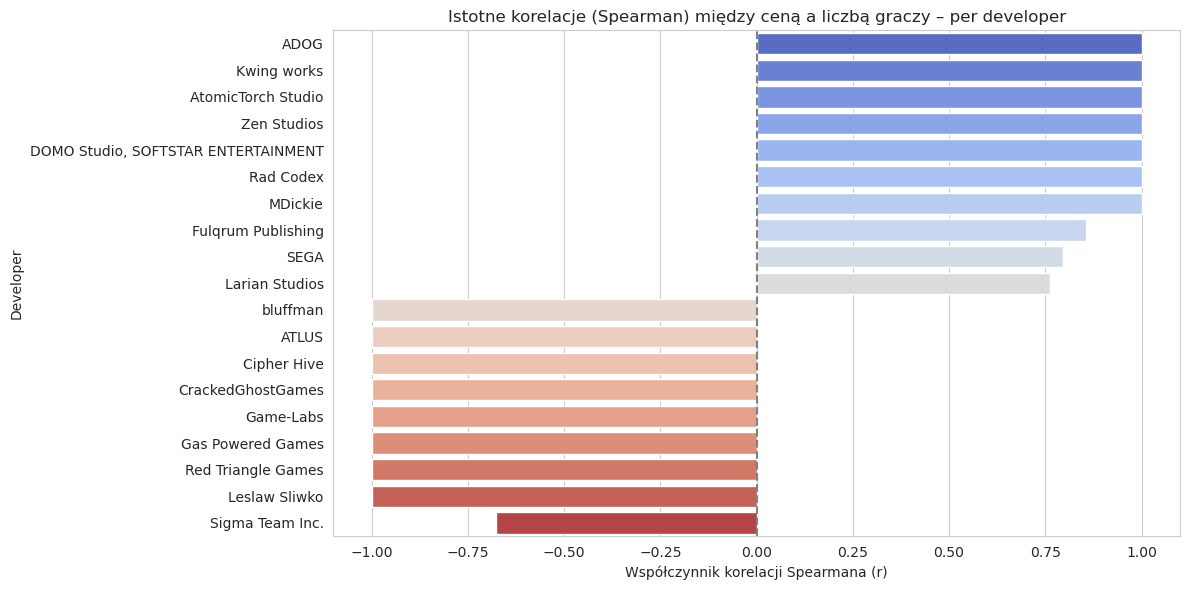

In [399]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_corr_dev,
    x='spearman_r',
    y='developer',
    palette='coolwarm',
    dodge=False
)

plt.title('Istotne korelacje (Spearman) między ceną a liczbą graczy – per developer')
plt.xlabel('Współczynnik korelacji Spearmana (r)')
plt.ylabel('Developer')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()



/tmp/ipykernel_63115/123474760.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


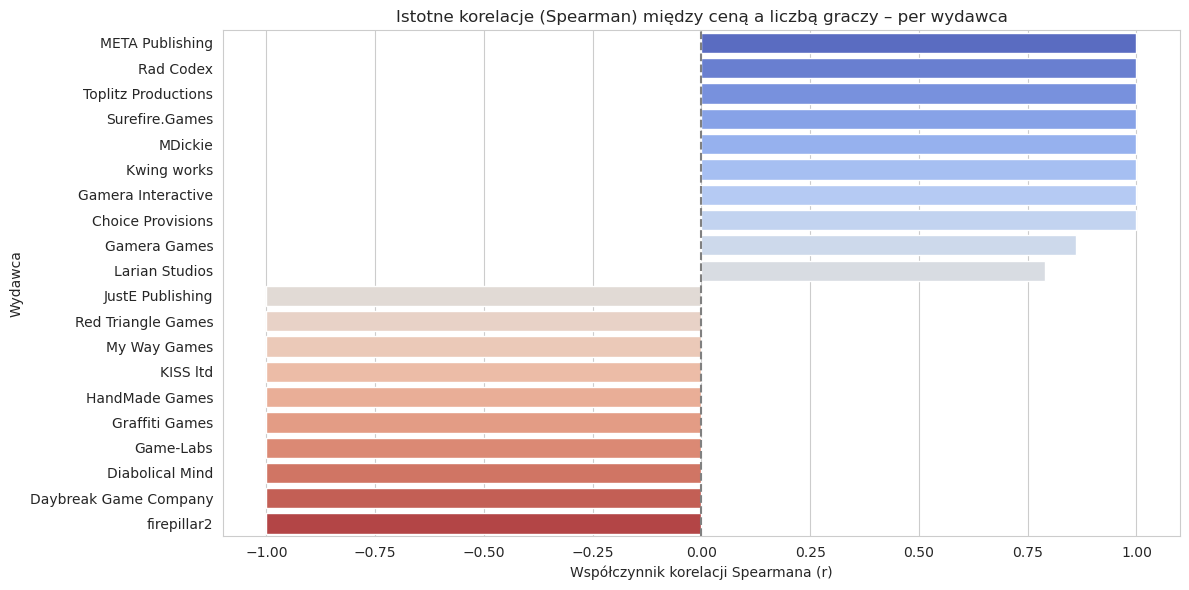

In [400]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_corr_pub,
    x='spearman_r',
    y='publisher',
    palette='coolwarm',
    dodge=False
)

plt.title('Istotne korelacje (Spearman) między ceną a liczbą graczy – per wydawca')
plt.xlabel('Współczynnik korelacji Spearmana (r)')
plt.ylabel('Wydawca')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

- Słupki niebieskie: droższe gry tego developera mają więcej graczy.
- Słupki czerwone: tańsze gry tego developera mają więcej graczy.
- Tu są tylko korelacje statystycznie istotne (p < 0.05).

### Ostatnia rzecz -- sprawdzimy co to za gry

In [401]:
important_publishers = publisher_corr_filtered['publisher'].unique()

In [402]:
games_from_publishers = df[df['publisher'].isin(important_publishers)].copy()

games_from_publishers = games_from_publishers.sort_values(
    by='average_estimated_owners_number', ascending=False
)


In [403]:
print(games_from_publishers[['publisher', 'game_title', 'release_price', 'average_estimated_owners_number']].head(20))


                 publisher                                     game_title  \
9           Larian Studios  Divinity: Original Sin 2 - Definitive Edition   
21     Paradox Interactive                             Crusader Kings III   
439    Paradox Interactive                                        Magicka   
2769        Larian Studios                                Baldur's Gate 3   
4           Larian Studios      Divinity: Original Sin - Enhanced Edition   
31     Paradox Interactive                            Pillars of Eternity   
46          Larian Studios               Divinity: Original Sin (Classic)   
50                    SEGA                               Persona 4 Golden   
2042                  SEGA           SEGA Mega Drive and Genesis Classics   
65                    SEGA                                       Yakuza 0   
370    Paradox Interactive                              Shadowrun Returns   
232    Paradox Interactive                             Age of Wonders III   

## Podsumowanie

1. Cena gry nie przekłada się  na większą popularność w ujęciu statystycznym. Popularność gry zależy prawdopodobnie od innych czynników: marki, jakości, recenzji, społeczności graczy – nie tylko od ceny.
2. Nie ma również zależności pomiędzy rokiem wydania a popularnością gry.
3. Ale wygląda na to, że niektórzy wydawcy i twórcy robią popularne tanie gry, a niektóre robią popularne drogie.
